# Explore the dataset

In [1]:
import json


DATA_PATH = 'geotagged_tweets_20160812-0912.jsons'


with open(DATA_PATH, 'r') as f:
    # data = json.load(f)
    for line in f:
        data = json.loads(line)
        break

# Each line represents a tweet.
data

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Aug 12 10:04:00 +0000 2016',
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/TY9DlZ584c',
    'expanded_url': 'http://twitter.com/DUPUY77/status/764039724818272256/photo/1',
    'id': 764039718237409281,
    'id_str': '764039718237409281',
    'indices': [27, 50],
    'media_url': 'http://pbs.twimg.com/media/CppqE1_UkAE2qFj.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CppqE1_UkAE2qFj.jpg',
    'sizes': {'large': {'h': 1136, 'resize': 'fit', 'w': 640},
     'medium': {'h': 1136, 'resize': 'fit', 'w': 640},
     'small': {'h': 680, 'resize': 'fit', 'w': 383},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/TY9DlZ584c'}],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 10774652,
    'id_str': '10774652',
    'indices': [0, 9],
    'name': 'TheBlaze',
    'screen_name': 'theblaze'},
   {'id': 25073877,
    'id_str': '2507387

* [Twitter entities](https://dev.twitter.com/overview/api/entities-in-twitter-objects)

# Read data

In [2]:
tweets = []

with open(DATA_PATH, 'r') as f:
    # data = json.load(f)
    for line in f:
        tweet = json.loads(line)
        tweets.append(tweet)

num_tweets = len(tweets)
num_tweets, tweets[:5]

(657307,
 [{'contributors': None,
   'coordinates': None,
   'created_at': 'Fri Aug 12 10:04:00 +0000 2016',
   'entities': {'hashtags': [],
    'media': [{'display_url': 'pic.twitter.com/TY9DlZ584c',
      'expanded_url': 'http://twitter.com/DUPUY77/status/764039724818272256/photo/1',
      'id': 764039718237409281,
      'id_str': '764039718237409281',
      'indices': [27, 50],
      'media_url': 'http://pbs.twimg.com/media/CppqE1_UkAE2qFj.jpg',
      'media_url_https': 'https://pbs.twimg.com/media/CppqE1_UkAE2qFj.jpg',
      'sizes': {'large': {'h': 1136, 'resize': 'fit', 'w': 640},
       'medium': {'h': 1136, 'resize': 'fit', 'w': 640},
       'small': {'h': 680, 'resize': 'fit', 'w': 383},
       'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
      'type': 'photo',
      'url': 'https://t.co/TY9DlZ584c'}],
    'symbols': [],
    'urls': [],
    'user_mentions': [{'id': 10774652,
      'id_str': '10774652',
      'indices': [0, 9],
      'name': 'TheBlaze',
      'screen_name'

## Findings
1. Useful information
  * Text
  * Mentions
  * Retweet (Included in Mentions?)
  * Publishing location, might be outside of US
  * Registration localtion, might be None
  * User info
2. Hillary Clinton
  * 'id': 1339835893,
  * 'name': 'Hillary Clinton'
  * 'screen_name': 'HillaryClinton'
3. Donald Trump
  * 'id': 25073877,
  * 'indices': [10, 26],
  * 'name': 'Donald J. Trump',
  * 'screen_name': 'realDonaldTrump'

In [3]:
# Check if there are deleted tweets that should be removed
# No deleted tweets.
for tweet in tweets:
    if 'delete' in tweet:
        print(tweet)

## Check all Hillary's tweets

In [4]:
tweets_hillary = []
for tweet in tweets:
    if tweet['user']['id'] == 1339835893:
        tweets_hillary.append(tweet)
# There was no tweet that was published by Hillary during the specificed time
len(tweets_hillary), tweets_hillary[:10]

(0, [])

## Check all Trump's tweets

In [5]:
tweets_trump = []
for tweet in tweets:
    if tweet['user']['id'] == 25073877:
        tweets_trump.append(tweet)

# Trump talked about Obamacare, maga, americafirst, poll among military
len(tweets_trump), [t['text'] for t in tweets_trump]

(6,
 ['We will repeal and replace disastrous #Obamacare! #TrumpPence16 https://t.co/Lx4Gdj5zGk',
  'Thank you Michigan. This is a MOVEMENT. We are going to MAKE AMERICA SAFE AND GREAT AGAIN! #TrumpPence16 https://t.co/vP3eqF3Zbb',
  'Will be back soon Virginia. We are going to MAKE AMERICA GREAT AGAIN! #TrumpPence16 https://t.co/IU4JPSi0rZ',
  'We will bring America together as ONE country again – united as Americans in common purpose and common dreams. #MAGA',
  'Thank you American Legion Post 610- for hosting @Mike_Pence &amp; I for a roundtable with labor leaders. #LaborDay #MAGA https://t.co/r0cwJlV38L',
  "'Donald Trump leads Hillary Clinton by 19 points among military, veteran voters: poll' #AmericaFirst #MAGA\nhttps://t.co/5FmxGtLkwt"])

In [6]:
import nltk

# Download stopwords
# nltk.download()
# OR
# python -m nltk.downloader stopwords
# OR
# from wordcloud import STOPWORDS

In [7]:
import re
from nltk.corpus import stopwords

# Clean the tweet text
# Remove punctuation, url, mentions, lower case
# Credit to http://ipullrank.com/step-step-twitter-sentiment-analysis-visualizing-united-airlines-pr-crisis/

stopwords = set(stopwords.words('english'))

def clean_tweet_text(text):
    # Remove urls with URL
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', text)
    # Remove @non-white space
    text = re.sub('@[^\s]+','', text)
    # Remove non-alphabet character
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    # Replace two or more consecutive white spaces with a single one
    text = re.sub('[\s]+', ' ', text)
    text = text.lower()
    # Trim
    text = text.strip('\'" ')
    # Remove stop words
    words = [word for word in text.split() if word not in stopwords]
    return ' '.join(words)

cleaned_tweets_trump = [clean_tweet_text(t['text']) for t in tweets_trump]
cleaned_tweets_trump

['repeal replace disastrous obamacare trumppence16',
 'thank michigan movement going make america safe great trumppence16',
 'back soon virginia going make america great trumppence16',
 'bring america together one country united americans common purpose common dreams maga',
 'thank american legion post 610 hosting amp roundtable labor leaders laborday maga',
 'donald trump leads hillary clinton 19 points among military veteran voters poll americafirst maga']

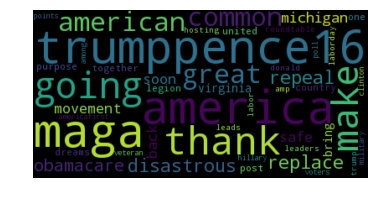

In [9]:
from wordcloud import WordCloud
import matplotlib.pylab as plt

# Generate a word cloud image
wordcloud = WordCloud().generate('\n'.join(cleaned_tweets_trump))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

## Analyse supporters
* Identify entity, i.e., who based on **hashtags**, or **mentions**
* Identify sentiment, positively or negatively support or neutral

# Explore hashtags

In [10]:
def get_hashtags(tweet):
    # tweet is a json object
    # Transform all hashtags to lower case
    return [hashtag['text'].lower() for hashtag in tweet['entities']['hashtags']]


all_hashtags = []
non_empty_hashtag_tweet_count = 0
for tweet in tweets:
    hashtags = get_hashtags(tweet)
    # Ignore the tweets that have empty hashtags
    if len(hashtags) > 0:
        non_empty_hashtag_tweet_count += 1
        all_hashtags += hashtags

non_empty_hashtag_tweet_count, len(all_hashtags), all_hashtags[:10]

(244082,
 554729,
 ['nojustice',
  'trumppence',
  'cnn',
  'newday',
  'trump',
  'isis',
  'nevertrump',
  'trump2016',
  'trumppence16',
  'makeamericagreatagain'])

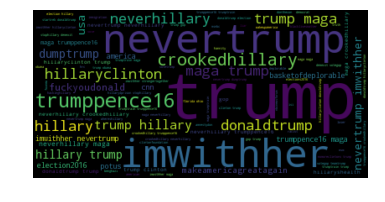

In [11]:
# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(all_hashtags))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

## Plot the distribution of all hashtags

In [12]:
import numpy as np

# Compute unique hashtags and their counts
unique_hashtags, counts = np.unique(all_hashtags, return_counts=True)

In [13]:
len(unique_hashtags), unique_hashtags[:10], counts[:10]

(49357, array(['008maga', '07primary', '08housingcrisis', '08pol',
        '0percentblackvotefortrump2016', '10000syrians', '100days',
        '100daysofhillary', '100followers', '100k'], 
       dtype='<U95'), array([1, 1, 1, 2, 1, 1, 1, 3, 1, 1]))

In [14]:
from scipy import stats
# 49357 hashtags are a lot, filter out less frequent ones
# Check basic statistics of the hashtag counts

stats.describe(counts)

DescribeResult(nobs=49357, minmax=(1, 57134), mean=11.239115019146221, variance=114424.53598274867, skewness=116.46746781556658, kurtosis=17419.534348316174)

[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   2.00000000e+00   2.00000000e+00   2.00000000e+00
   3.00000000e+00   6.00000000e+00   1.50000000e+01   5.71340000e+04]


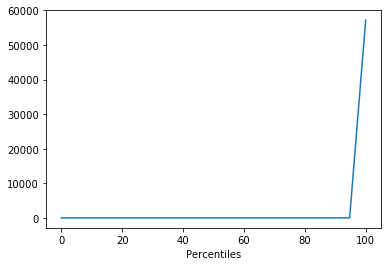

In [15]:
import matplotlib.pylab as plt

# Compute percentiles
qs = np.linspace(0, 100, num=20)
percentiles = np.percentile(counts, qs)
# 90% hashtags occur less than or equal 6 times
print(percentiles)

plt.xlabel('Percentiles')
plt.plot(qs, percentiles)
plt.show()

In [16]:
# Filter out less frequent hashtags

mask = counts >= 1000

freq_counts = counts[mask]
freq_hashtags = unique_hashtags[mask]
len(freq_hashtags)

47

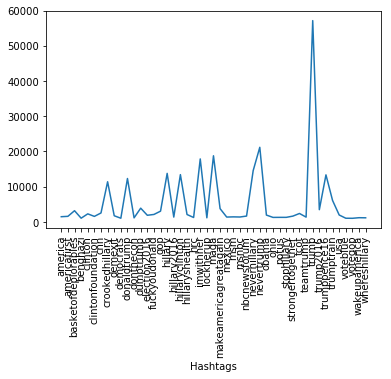

In [17]:
import matplotlib.pylab as plt

% matplotlib inline
plt.plot(freq_counts)

plt.xticks(np.arange(len(freq_counts)), freq_hashtags, rotation=90)
plt.xlabel('Hashtags')
plt.show()

### Further filter out hashtags

In [18]:
# Fisrt sort the hashtags based on their counts
sorted_freq_hashtags, sorted_freq_counts = zip(*sorted(zip(freq_hashtags, freq_counts), key=lambda x: x[1], reverse=True))

[e for e in zip(sorted_freq_hashtags[:20], sorted_freq_counts[:20])]

[('trump', 57134),
 ('nevertrump', 21165),
 ('maga', 18760),
 ('imwithher', 17863),
 ('neverhillary', 14541),
 ('hillary', 13760),
 ('hillaryclinton', 13403),
 ('trumppence16', 13339),
 ('donaldtrump', 12303),
 ('crookedhillary', 11381),
 ('trumptrain', 6067),
 ('dumptrump', 3881),
 ('makeamericagreatagain', 3746),
 ('trump2016', 3455),
 ('basketofdeplorables', 3163),
 ('gop', 3037),
 ('cnn', 2520),
 ('tcot', 2376),
 ('clinton', 2268),
 ('fuckyoudonald', 2098)]

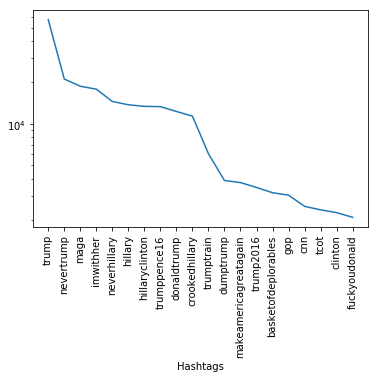

In [19]:
more_freq_counts = sorted_freq_counts[:20]
more_freq_hashtags = sorted_freq_hashtags[:20]

%matplotlib inline
# or notebook

plt.semilogy(more_freq_counts)

plt.xticks(np.arange(len(more_freq_counts)), more_freq_hashtags, rotation=90)
plt.xlabel('Hashtags')
plt.show()

# Explore the mentions

In [20]:
def get_mentions(tweet):
    # (id, screen_name) represents (id of the mentioned twitter user, his / her screen name)
    # If someone's tweet was replied, he or she will be in the list
    return [(e['id'], e['screen_name']) for e in tweet['entities']['user_mentions']]


non_empty_mentions_count = 0
all_mentions = []
for tweet in tweets:
    mentions = get_mentions(tweet)
    # Simply ignore the tweets that don't have any mentions.
    if len(mentions) > 0:
        non_empty_mentions_count += 1
        all_mentions += mentions

non_empty_mentions_count, len(all_mentions), all_mentions[:20]

(499243,
 1127640,
 [(10774652, 'theblaze'),
  (25073877, 'realDonaldTrump'),
  (813286, 'BarackObama'),
  (17629860, 'FBI'),
  (3290070855, 'LorettaLynch'),
  (25073877, 'realDonaldTrump'),
  (10774652, 'theblaze'),
  (25073877, 'realDonaldTrump'),
  (1339835893, 'HillaryClinton'),
  (25073877, 'realDonaldTrump'),
  (15693493, 'funnyordie'),
  (25073877, 'realDonaldTrump'),
  (1339835893, 'HillaryClinton'),
  (11966392, 'Geraldanthro'),
  (3600539122, 'NeilTurner_'),
  (25073877, 'realDonaldTrump'),
  (2467791, 'washingtonpost'),
  (4852163069, 'mike4193496'),
  (25073877, 'realDonaldTrump'),
  (25073877, 'realDonaldTrump')])

In [21]:
# Count the number of tweets mentioning Hillary or Trump
num_mention_hillary = 0
num_mention_trump = 0
num_mention_both = 0

for tweet in tweets:
    mentions = get_mentions(tweet)
    # trump has a shorter id than hillary
    mention_hillary = (1339835893, 'HillaryClinton') in mentions
    mention_trump = (25073877, 'realDonaldTrump') in mentions
    if mention_hillary:
        num_mention_hillary += 1
    if mention_trump:
        num_mention_trump += 1
    if mention_hillary and mention_trump:
        num_mention_both += 1

# Almost every tweet mentioned either of them if the mentions were not empty
num_mention_hillary, num_mention_trump, num_mention_both

(140740, 325834, 28253)

### Plot the number of tweets mentioning trump or hillary versus time

In [22]:
from datetime import datetime, timedelta


# August 12, 2016 - 00:00:00 AM
start_time = datetime.utcfromtimestamp(1470960000)

def get_time(tweet, type='hour'):
    """
    Get the publishing time of a tweet
    type is either or day, hour
    """
    assert type in ['day', 'hour'], 'Unsupported time type'
    # The timestamp_ms field or created_at
    publish_time_delta = datetime.utcfromtimestamp(int(tweet['timestamp_ms']) // 1000) - start_time
    
    if type == 'day':
        return publish_time_delta.days
    else:
        return publish_time_delta.days * 24 + publish_time_delta.seconds // 3600

get_time(data)

10

In [23]:
times_mention_hillary = []
times_mention_trump = []
times_mention_both = []

for tweet in tweets:
    mentions = get_mentions(tweet)
    mention_hillary = (1339835893, 'HillaryClinton') in mentions
    mention_trump = (25073877, 'realDonaldTrump') in mentions
    
    relative_time = get_time(tweet)
    if mention_hillary:
        times_mention_hillary.append(relative_time)
    if mention_trump:
        times_mention_trump.append(relative_time)
    if mention_hillary and mention_trump:
        times_mention_both.append(relative_time)

len(times_mention_hillary), len(times_mention_trump), len(times_mention_both)

(140740, 325834, 28253)

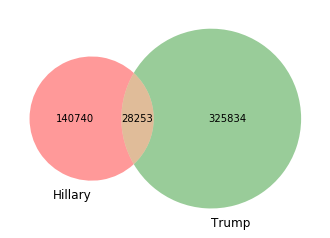

In [24]:
from matplotlib_venn import venn2, venn2_circles

v = venn2(subsets=(140740, 325834, 28253), set_labels=('Hillary', 'Trump'))

plt.show()

In [25]:
times_mention_hillary[:10], times_mention_trump[:10]

([10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
 [10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [26]:
unique_times_h, counts_h = np.unique(times_mention_hillary, return_counts=True)
unique_times_t, counts_t = np.unique(times_mention_trump, return_counts=True)
unique_times_ht, counts_ht = np.unique(times_mention_both, return_counts=True)

# Sort the mentions based on publishing times. Note sorted counts is not sorted actually.
sorted_unique_times_h, sorted_counts_h = zip(*sorted(zip(unique_times_h, counts_h), key=lambda x: x[0]))
sorted_unique_times_t, sorted_counts_t = zip(*sorted(zip(unique_times_t, counts_t), key=lambda x: x[0]))
sorted_unique_times_ht, sorted_counts_ht = zip(*sorted(zip(unique_times_ht, counts_ht), key=lambda x: x[0]))

print(len(sorted_counts_h), len(sorted_counts_t), len(sorted_counts_ht))
'{}'.format(sorted_counts_h[-20:]), '{}'.format(sorted_counts_t[-20:]), '{}'.format(sorted_counts_ht[-20:])

748 748 748


('(456, 412, 413, 654, 727, 530, 425, 399, 598, 332, 262, 122, 102, 90, 72, 68, 125, 225, 256, 128)',
 '(433, 473, 389, 335, 480, 375, 379, 289, 334, 259, 204, 164, 106, 73, 54, 51, 147, 294, 356, 129)',
 '(60, 78, 48, 69, 75, 64, 48, 43, 82, 60, 32, 10, 8, 14, 13, 7, 14, 43, 38, 30)')

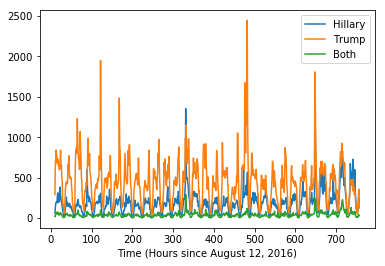

In [27]:
# % matplotlib notebook
% matplotlib inline
plt.plot(sorted_unique_times_h, sorted_counts_h, label='Hillary')
plt.plot(sorted_unique_times_t, sorted_counts_t, label='Trump')
plt.plot(sorted_unique_times_ht, sorted_counts_ht, label='Both')

plt.xlabel('Time (Hours since August 12, 2016)')
plt.legend()
plt.show()

### Mentions versus Places
* The place where the tweet was published ['place']['full_name'] (['country_code']), e.g., Frontenac, MO, US
* The place where the user lives in ['user']['location'], e.g., Miami
* These addresses are inconsistent ('neighborhood', 'poi', 'country', 'admin', 'city'), it is better to use the latitude and longitude

In [28]:
places_mention_hillary = []
places_mention_trump = []
places_mention_both = []

from IPython.core.debugger import set_trace

def get_place(tweet, type='current'):
    # Get the publishing place or registration place of a tweet.
    assert type in ['current', 'registration'], 'Unsupported place type'
    if type == 'current':
#         set_trace()
        if tweet['place'] is not None:
            # longitude, latitude
            return np.mean(tweet['place']['bounding_box']['coordinates'][0], axis=0).tolist()
        else:
            return None
    else:
        if tweet['user'] is not None:
            return tweet['user']['location']
        else:
            return None

for i, tweet in enumerate(tweets):
    mentions = get_mentions(tweet)
    mention_hillary = (1339835893, 'HillaryClinton') in mentions
    mention_trump = (25073877, 'realDonaldTrump') in mentions
    
    place = get_place(tweet)
    if place is not None:
        if mention_hillary:
            places_mention_hillary.append(place)
        if mention_trump:
            places_mention_trump.append(place)
        if mention_hillary and mention_trump:
            places_mention_both.append(place)

# Many tweets hide their publishing places
len(places_mention_hillary), len(places_mention_trump), len(places_mention_both)

(140739, 325832, 28253)

In [29]:
import random
# Write to json and visualization using D3.js
# Too large for Tableau. Down-sampled with ratio 0.6. There might be a problem for the both case.
keep_prob = 1.0
# with open('places.json', 'w') as f:
#     obj = {'places':
#     json.dump(obj=obj, fp=f)

import csv

with open('places.csv', 'w') as csvfile:
    fieldnames = ['Longitude', 'Latitude', 'Label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for e in places_mention_hillary:
        writer.writerow({'Longitude': e[0], 'Latitude': e[1], 'Label': 'Hillary'})
    
    for e in places_mention_trump:
        writer.writerow({'Longitude': e[0], 'Latitude': e[1], 'Label': 'Trump'})
    
    for e in places_mention_both:
        writer.writerow({'Longitude': e[0], 'Latitude': e[1], 'Label': 'Both'})

#### Visualization on the American map

* Check Tableau visualization
[2016-US-election-analysis-dalei](https://dub01.online.tableau.com/t/yeyedaren/views/2016-US-election-analysis-dalei/Sheet1?:embed=y&:showAppBanner=false&:showShareOptions=true&:display_count=no&:showVizHome=no)
* Compare with [Presidential Election Results: Donald J. Trump Wins](https://www.nytimes.com/elections/results/president)

## Mention network

In [30]:
import networkx as nx

# (id, screen_name) >> mentioned >> (id, screen_name)
# Create a new directed graph
DG = nx.DiGraph()


for tweet in tweets:
    user = tweet['user']
    user_id = user['id']
    DG.add_node(user_id, user)
    
    mentions = get_mentions(tweet)
    for mention in mentions:
        DG.add_node(mention[0], name=mention[1])
        DG.add_edge(user_id, mention[0], type='mention')

# Hillary, Trump
print(DG.node[1339835893], DG.node[25073877])
# Trump mentioend DG.node[22203756]
print(DG.successors(1339835893), DG.successors(25073877))
print(DG.degree(1339835893), DG.degree(25073877))

{'name': 'HillaryClinton'} {'name': 'realDonaldTrump', 'id': 25073877, 'id_str': '25073877', 'screen_name': 'realDonaldTrump', 'location': 'New York, NY', 'url': 'http://www.DonaldJTrump.com', 'description': '#TrumpPence16', 'protected': False, 'verified': True, 'followers_count': 11362332, 'friends_count': 42, 'listed_count': 38247, 'favourites_count': 37, 'statuses_count': 33118, 'created_at': 'Wed Mar 18 13:46:38 +0000 2009', 'utc_offset': -14400, 'time_zone': 'Eastern Time (US & Canada)', 'geo_enabled': True, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': '6D5C18', 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/530021613/trump_scotland__43_of_70_cc.jpg', 'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/530021613/trump_scotland__43_of_70_cc.jpg', 'profile_background_tile': True, 'profile_link_color': '0D5B73', 'profile_sidebar_border_color': 'BDDCAD', 'profile_sid

In [31]:
# takes too long to run
# nx.draw(DG)

# Sentiment analysis

## Try [Google NLP API](https://cloud.google.com/natural-language/docs/reference/libraries#client-libraries-usage-python) pre-trained classifier (Or  [Stanford CoreNLP](https://github.com/stanfordnlp/python-stanford-corenlp))
* Follow the [official guide](https://googlecloudplatform.github.io/google-cloud-python/latest/language/usage.html) to setup the authentication and install required packages on Google Cloud Compute Engine

In [32]:
# Imports the Google Cloud client library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
from oauth2client.client import GoogleCredentials

# Instantiates a client
client = language.LanguageServiceClient()

def get_sentiment(text):
    document = types.Document(content=text, type=enums.Document.Type.PLAIN_TEXT)

    # Detects the sentiment of the text. document_sentiment represents the emotion of the whole document.
    # sentences represents the sentiment of each sentence.
    # To reduce API rquest times, put a number of sentences into a document.
    sentiment = client.analyze_sentiment(document=document, encoding_type='UTF32')
    
    return sentiment

# The text to analyze
text = 'I am really happy to make Google Cloud NLP API work! \n Today it is so rainy that I cannot go outside!'
sentiment = get_sentiment(text)
document_sentiment = sentiment.document_sentiment
sentences_sentiment = sentiment.sentences

print('Text: {}'.format(text))
# score, -1 to 1, from negative to positive
# magnitude, the strenght of the emotion
print('Sentiment: {}, {}'.format(document_sentiment.score, document_sentiment.magnitude))
print(sentiment.sentences)

Text: I am really happy to make Google Cloud NLP API work! 
 Today it is so rainy that I cannot go outside!
Sentiment: 0.20000000298023224, 1.100000023841858
[text {
  content: "I am really happy to make Google Cloud NLP API work!"
}
sentiment {
  magnitude: 0.800000011920929
  score: 0.800000011920929
}
, text {
  content: "Today it is so rainy that I cannot go outside!"
  begin_offset: 55
}
sentiment {
  magnitude: 0.20000000298023224
  score: -0.20000000298023224
}
]


In [33]:
## nltk vader
# pip install twython
# python -m nltk.downloader vader_lexicon
from nltk.sentiment import vader

vader_analyzer = vader.SentimentIntensityAnalyzer()

print(vader_analyzer.polarity_scores('I am really happy to make Google Cloud NLP API work'))
print(vader_analyzer.polarity_scores('Today it is so rainy that I cannot go outside!'))

{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.6115}
{'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'compound': -0.2578}


## Get all tweets text, hashtags and mentions

In [34]:
dataset = []
for tweet in tweets:
    # Ignore languages other than English.
    # Because the Google sentiment anslysis tool does not support others.
    if tweet['lang'] == 'en':
        dataset.append({            
            'text': clean_tweet_text(tweet['text']),
            'hashtags': get_hashtags(tweet),
            'mentions': get_mentions(tweet),
            'place': get_place(tweet),
            'time': get_time(tweet)
        })

len(dataset), dataset[:10]

(563329,
 [{'hashtags': ['nojustice', 'trumppence'],
   'mentions': [(813286, 'BarackObama'),
    (17629860, 'FBI'),
    (3290070855, 'LorettaLynch'),
    (25073877, 'realDonaldTrump')],
   'place': [-91.09079949999999, 30.4591],
   'text': 'collusion together nojustice trumppence',
   'time': 10},
  {'hashtags': [],
   'mentions': [(1339835893, 'HillaryClinton')],
   'place': [145.0531355, -37.9725665],
   'text': 'one year things done eight',
   'time': 10},
  {'hashtags': ['cnn', 'newday', 'trump', 'isis'],
   'mentions': [],
   'place': [-76.62048200000001, 39.284712999999996],
   'text': 'cnn newday clear trump deliberately throwing race 2007 knew isis destabilization mideast started w iraq invasion',
   'time': 10},
  {'hashtags': ['nevertrump'],
   'mentions': [(25073877, 'realDonaldTrump')],
   'place': [-116.51728949999999, 33.8250795],
   'text': 'recognize lie came mouth continually nevertrump',
   'time': 10},
  {'hashtags': [],
   'mentions': [(15693493, 'funnyordie'), (25

### Focus on the tweets whose hashtags contain hillary (trump) or mentions contain hillary (trump) only

In [35]:
def name_exists(hahstags, name):
    return any([name in hashtag for hashtag in hahstags])

def get_entity(example):
    mention_hillary = (1339835893, 'HillaryClinton') in example['mentions']
    mention_trump = (25073877, 'realDonaldTrump') in example['mentions']
    
    # If the hashtags of a tweet contain hillary or the mentions contain only hillary
    if name_exists(example['hashtags'], 'hillary') or (mention_hillary and not mention_trump):
        return 'Hillary'
    if name_exists(example['hashtags'], 'trump') or (mention_trump and not mention_hillary):
        return 'Trump'
    # All other cases, return None    
    return None
    

def get_entity_sentiment(example):
        if example['text'] != '':
            entity = get_entity(example)
            # Ignore the tweets that mentioned them together, whcih need further analysis.
            if entity:
                # Analyze the sentiments
                # sentiment = get_sentiment(example['text']).document_sentiment
                sentiment = vader_analyzer.polarity_scores(example['text'])
                return entity, sentiment['compound'], example['time'], example['place']
        return None

print(get_entity_sentiment(dataset[0]))

('Trump', 0.0, 10, [-91.09079949999999, 30.4591])


In [36]:
entities, sentiments, times, places = [], [], [], []

# Down-sample the dataset.
# rnd_indices = np.random.choice(range(len(dataset)), size=20, replace=False)
smaller_dataset = np.array(dataset)

# Batch processing. A bug to be fixed.
# splits = np.linspace(0, len(smaller_dataset) + 1, dtype=np.int32, num=600)

sentiment_dataset = []
for example in smaller_dataset:
    res = get_entity_sentiment(example)
    if res:
        entity, sentiment, time, place = res
        sentiment_dataset.append({
            'text': example['text'],
            'entity': entity,
            'sentiment': sentiment,
            'time': time,
            'longitude': place[0] if place else None,
            'latitude': place[1] if place else None
        })

# The Google NLP API support for languages other than English is bad.
# Moreover, the tweets published outside US should be considered further.
print(len(sentiment_dataset))
print(sentiment_dataset[:10])

463742
[{'text': 'collusion together nojustice trumppence', 'entity': 'Trump', 'sentiment': 0.0, 'time': 10, 'longitude': -91.09079949999999, 'latitude': 30.4591}, {'text': 'one year things done eight', 'entity': 'Hillary', 'sentiment': 0.0, 'time': 10, 'longitude': 145.0531355, 'latitude': -37.9725665}, {'text': 'cnn newday clear trump deliberately throwing race 2007 knew isis destabilization mideast started w iraq invasion', 'entity': 'Trump', 'sentiment': 0.3818, 'time': 10, 'longitude': -76.62048200000001, 'latitude': 39.284712999999996}, {'text': 'recognize lie came mouth continually nevertrump', 'entity': 'Trump', 'sentiment': 0.0, 'time': 10, 'longitude': -116.51728949999999, 'latitude': 33.8250795}, {'text': 'kid know suing someone thats beautiful thing 1 human could another human', 'entity': 'Trump', 'sentiment': 0.4215, 'time': 10, 'longitude': -74.06378699999999, 'latitude': 40.778489}, {'text': 'co founder isis crooked evil lying witch live', 'entity': 'Hillary', 'sentiment

### Explore Hillary's supporters

In [37]:
h_supporters = [s for s in sentiment_dataset if s['entity'] == 'Hillary']
h_supporters[:5]

[{'entity': 'Hillary',
  'latitude': -37.9725665,
  'longitude': 145.0531355,
  'sentiment': 0.0,
  'text': 'one year things done eight',
  'time': 10},
 {'entity': 'Hillary',
  'latitude': 32.863917,
  'longitude': -96.961483,
  'sentiment': -0.8834,
  'text': 'co founder isis crooked evil lying witch live',
  'time': 10},
 {'entity': 'Hillary',
  'latitude': 32.863917,
  'longitude': -96.961483,
  'sentiment': -0.765,
  'text': 'isis co founder hillary clinton obama also devil hillary sits left hand devil',
  'time': 10},
 {'entity': 'Hillary',
  'latitude': 29.673171500000002,
  'longitude': -82.3302695,
  'sentiment': -0.7003,
  'text': 'hannity think disbarred ignorant mr hamburg dishonest',
  'time': 10},
 {'entity': 'Hillary',
  'latitude': 30.864107500000003,
  'longitude': 72.35549850000001,
  'sentiment': 0.4215,
  'text': 'true us officially selling arms isis',
  'time': 10}]

### Explore Trump's supporters

In [38]:
t_supporters = [s for s in sentiment_dataset if s['entity'] == 'Trump']
t_supporters[:5]

[{'entity': 'Trump',
  'latitude': 30.4591,
  'longitude': -91.09079949999999,
  'sentiment': 0.0,
  'text': 'collusion together nojustice trumppence',
  'time': 10},
 {'entity': 'Trump',
  'latitude': 39.284712999999996,
  'longitude': -76.62048200000001,
  'sentiment': 0.3818,
  'text': 'cnn newday clear trump deliberately throwing race 2007 knew isis destabilization mideast started w iraq invasion',
  'time': 10},
 {'entity': 'Trump',
  'latitude': 33.8250795,
  'longitude': -116.51728949999999,
  'sentiment': 0.0,
  'text': 'recognize lie came mouth continually nevertrump',
  'time': 10},
 {'entity': 'Trump',
  'latitude': 40.778489,
  'longitude': -74.06378699999999,
  'sentiment': 0.4215,
  'text': 'kid know suing someone thats beautiful thing 1 human could another human',
  'time': 10},
 {'entity': 'Trump',
  'latitude': -27.382143000000003,
  'longitude': 152.99319649999998,
  'sentiment': 0.0772,
  'text': 'want comparison try maimed vets pre amp post iraq pullout bar graph',


In [39]:
print('Mean sentiment value, Hillary: {}, Trump: {}'.format(
    np.mean([h['sentiment'] for h in h_supporters]),
    np.mean([t['sentiment'] for t in t_supporters])))
# Hillary lost to Trump on average

Mean sentiment value, Hillary: -0.02783069029981868, Trump: -0.006202468456025086


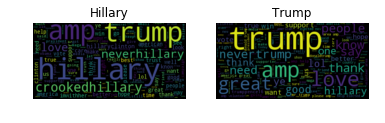

In [40]:
h_texts = [h['text'] for h in h_supporters if h['sentiment'] > 0.4]
t_texts = [t['text'] for t in t_supporters if t['sentiment'] > 0.4]

# Generate a word cloud image
wordcloud_h = WordCloud().generate('\n'.join(h_texts))
wordcloud_t = WordCloud().generate('\n'.join(t_texts))

figure, (ax_h, ax_t) = plt.subplots(1, 2)
ax_h.imshow(wordcloud_h, interpolation='bilinear')
ax_t.imshow(wordcloud_t, interpolation='bilinear')

ax_h.set_title('Hillary')
ax_t.set_title('Trump')

ax_h.axis("off")
ax_t.axis("off")

plt.show()

In [41]:
# Save to csv and visualize in Tableau
with open('sentiments.csv', 'w') as csvfile:
    fieldnames = h_supporters[0].keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for h in h_supporters:
        writer.writerow(h)
    
    for t in t_supporters:
        writer.writerow(t)

In [42]:
## test block
# e = datetime.utcfromtimestamp(int(1470996240))
# e
# tweets[36414] where place is None
# data['place']['full_name']
# data['user']['location']
# places_mention_hillary[:5]
# import us
# print(us.states.lookup('CA'))


# any([e for e in []])

# name_exists(['cnn', 'newday', 'trump', 'isis'], name='hillary')
# sentiment.sentences[0].sentiment.score

# len(dataset)
# np.linspace(0, len(dataset), dtype=np.int32, num=6000)

# len(entities)
# len(sentences_sentiments)
# data['lang']

# isinstance(sentiment_dataset, list)
# % matplotlib inline

In [43]:
?